### **Import Librerías**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
! pip install chart_studio
import chart_studio.plotly as py
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 


## **Contexto e hipótesis de interés**

# Objetivo

El objetivo de este trabajo es brindar una herramienta a aquellas personas que necesitan comprar o vender un inmueble en la provincia de buenos aires. Para ello, crearemos un modelo capaz de predecir el valor inmobiliario teniendo en cuenta las distintas variables que afectan al precio.

# Contexto comercial

Hoy existen numerosos medios para publicar la venta de un inmueble, pero el principal problema es poder determinar con el mayor grado de certeza cual es el valor del mismo, en base a las caracteristicas inheretes a la propiedad como: Tamaño, cantidad de ambientes, ubicacion, entre otros.

# Problema Comercial

1- Preguntas/hipotesis

a) ¿Qué tipo de propiedad tiene más oferta y en qué zona de Buenos Aires?

b) ¿El precio de mt2 varía según el tipo y ubicación ?

c) ¿Varía el precio del mt2 según la cantidad de habitaciones por tipo?

d) ¿A mayor superficie menor precio por m2?


# Contexto Analítico

Partimos de una base de datos (CSV) de 146 mil registros de la provincia de Buenos Aires y seleccionamos las principales variables que creemos que afectan al precio: Ubicacion;superficie;tipo de inmueble; N° habitaciones y N° baños.

# **Tabla de contenidos:**

**1. Importación de dataset**

  1.1 Importamos y procesamos el dataset Properati
  
  1.2 Visualización de la forma del dataset

  1.3 Creación de dataframe con propiedades que son casas, departamento y ph


**2. Análisis de visualización de datos**

2.1 Visualizamos la cantidad y tipos de propiedades de nuestro dataset

2.2 Contabilizamos las propiedades por "Zonas"

2.3 Visualización piechart de las propiedades por Zonas

2.4 Visualización de propiedades por Barrios

2.5 Visualización scatterplot entre cantidad de habitaciones y precios


**3. Data Wrangling**


3.1 Creación variable de valor por mt2 (valorm2)

3.2 Análisis de outliers

3.3 Determinación de lo valores limites y maximos para las distintas variables, según el tipo (Casa;PH;Depto)

3.4 Análisis de valores nulos


**4. Análisis descriptivo**

4.1 Analisis univariado

4.2 Analisis bivariado


**5. Obtención de insights**

**6. Conclusión**




### **1.1 Importamos y procesamos nuestro dataset Properati.csv**

In [ ]:
df_propiedades = pd.read_csv("/content/drive/MyDrive/Cursos/Curso Data Science/Proyecto Final - 2da preentrega/DS_Proyecto_01_Datos_Properati.csv")

# imprimo las primeras 5 observaciones. Eso sirve para identificar cualquier error/inconsistencia al importar los datos

df_propiedades.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


## New section

### **1.2 Visualización de forma de dataset**

In [ ]:
#veremos la forma de nuestro dataset (instancias y atributos)
print(df_propiedades.shape)  


(146660, 19)


In [ ]:
df_propiedades.info

<bound method DataFrame.info of         start_date    end_date  created_on        lat        lon         l1  \
0       2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1       2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2       2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3       2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4       2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   
...            ...         ...         ...        ...        ...        ...   
146655  2019-07-31  2019-08-13  2019-07-31 -34.816348 -58.181963  Argentina   
146656  2019-07-31  2019-08-14  2019-07-31 -34.446459 -58.937810  Argentina   
146657  2019-07-31  2019-08-14  2019-07-31 -34.444633 -58.981606  Argentina   
146658  2019-07-31  2019-08-14  2019-07-31 -34.444830 -58.981796  Argentina   
146659  2019-07-31  2019-10-12  2019-07-31 -34.444760 -58.981885  Argentina   

                   

### **1.3 Creación de dataframe con propiedades que son casas, departamento y ph**

In [ ]:
Casa_Habitacion = df_propiedades[df_propiedades["property_type"].isin(["Departamento","Casa","PH"])]

## **2. Análisis de visualización de datos**

### **2.1 Visualizamos la cantidad y tipos de propiedades de nuestro dataset**

Text(0.5, 1.0, 'Histograma de Propiedades')

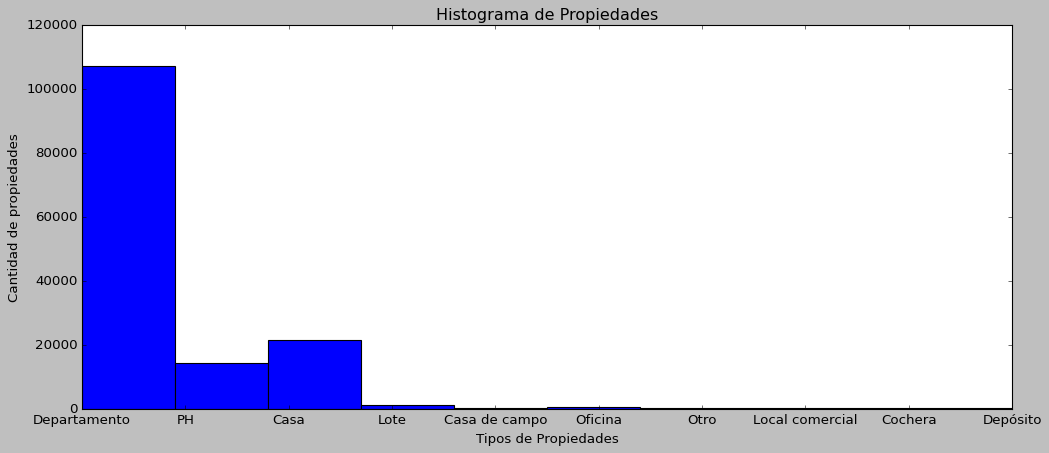

In [ ]:
mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(15, 6))  #define el tamano del gráfico
ax.hist(x= df_propiedades.property_type, bins=None, density=False, orientation='vertical')
ax.set_xlabel('Tipos de Propiedades')
ax.set_ylabel('Cantidad de propiedades')
ax.set_title('Histograma de Propiedades')


### **2.2 Contabilizamos las propiedades por "Zonas"**

In [ ]:
Prop_Zonas = df_propiedades[['l2','property_type']].groupby(by='l2').count()
Prop_Zonas

,property_type
l2,
Bs.As. G.B.A. Zona Norte,24282
Bs.As. G.B.A. Zona Oeste,12666
Bs.As. G.B.A. Zona Sur,17173
Capital Federal,92539


In [ ]:
Prop_Zonas.index

Index(['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste',
       'Bs.As. G.B.A. Zona Sur', 'Capital Federal'],
      dtype='object', name='l2')

### **2.3 Visualización piechart de las propiedades por Zona**

### Podemos visualizar a simple vista que Capital Federal concentra la mayor cantidad de propiedades.

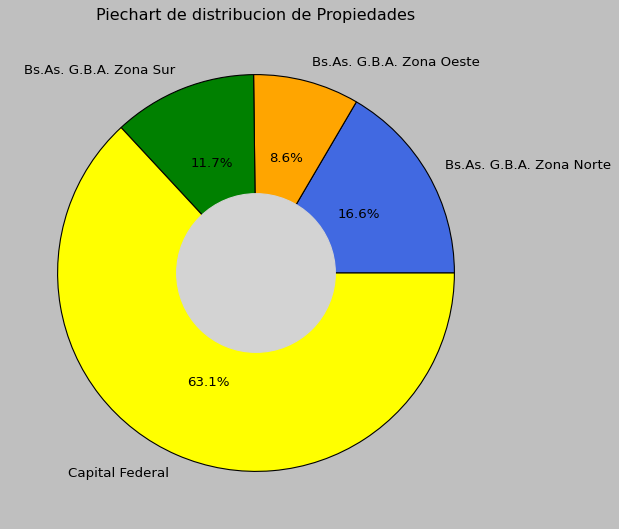

In [ ]:
fix, ax = plt.subplots(figsize = (8,8))
# creo el pieplot
plt.pie(Prop_Zonas.property_type, labels = Prop_Zonas.index,autopct='%1.1f%%', colors=['royalblue','orange',"green","yellow"])
ax.set_title('Piechart de distribucion de Propiedades')
# Circulo en medio
my_circle=plt.Circle( (0,0), 0.4, color='lightgrey')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()

### **2.4 Visualización de propiedades por Barrios**

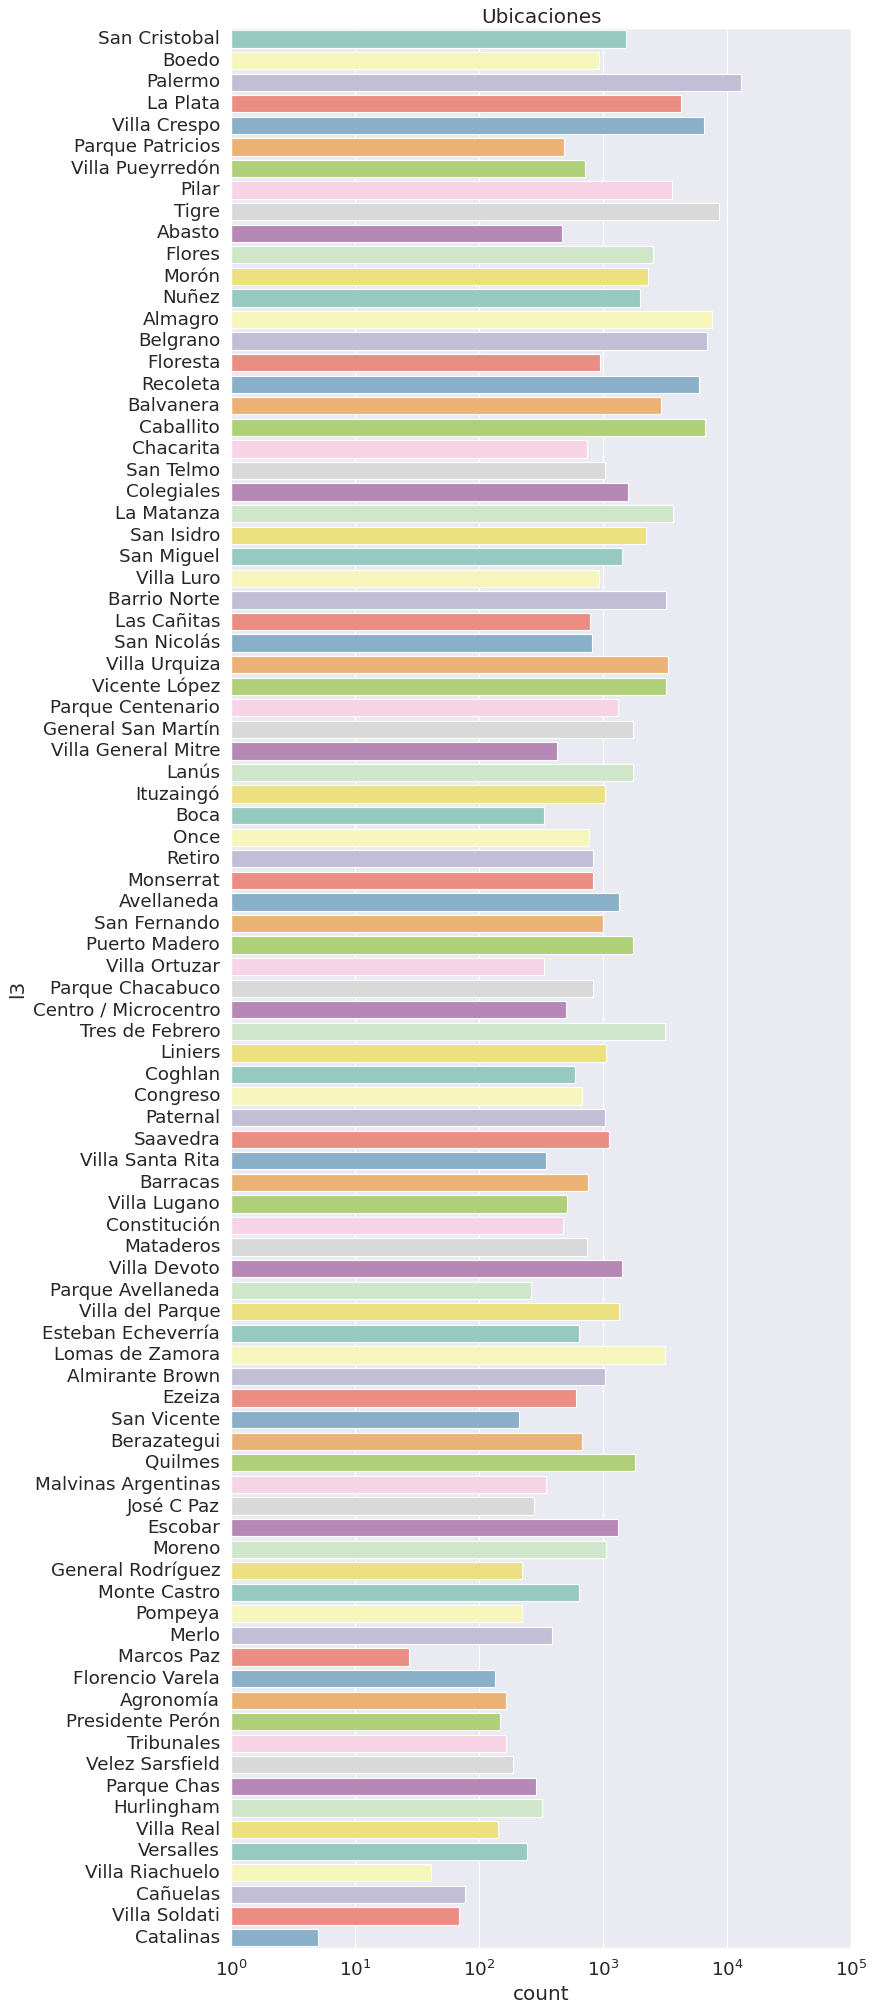

In [ ]:
fig, ax = plt.subplots(figsize=(10, 30))
a = sns.countplot(data= Casa_Habitacion, y="l3", palette="Set3")
a.set_title('Ubicaciones')
a.set_xscale("log")

### **2.5 Visualización scatterplot entre cantidad de habitaciones y precios**

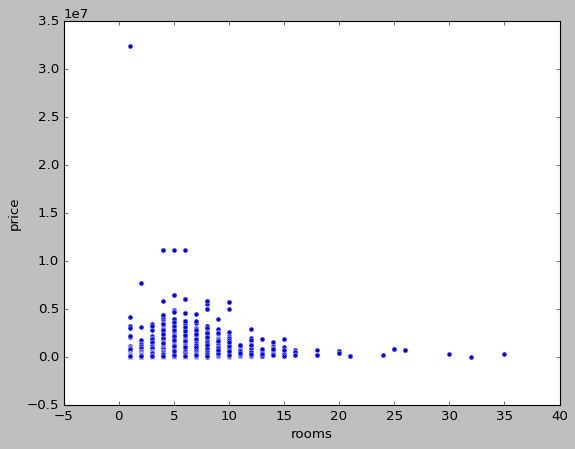

In [ ]:
sns.scatterplot(data= Casa_Habitacion, x="rooms", y="price")

### Nos quedamos con los tipos de propiedades que contienen más cantidad en nuestro dataset: Departamento, Casa y PH.

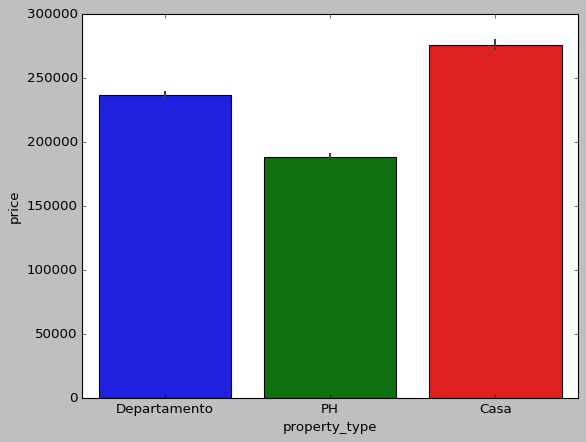

In [ ]:
sns.barplot(data=Casa_Habitacion, x="property_type", y="price")

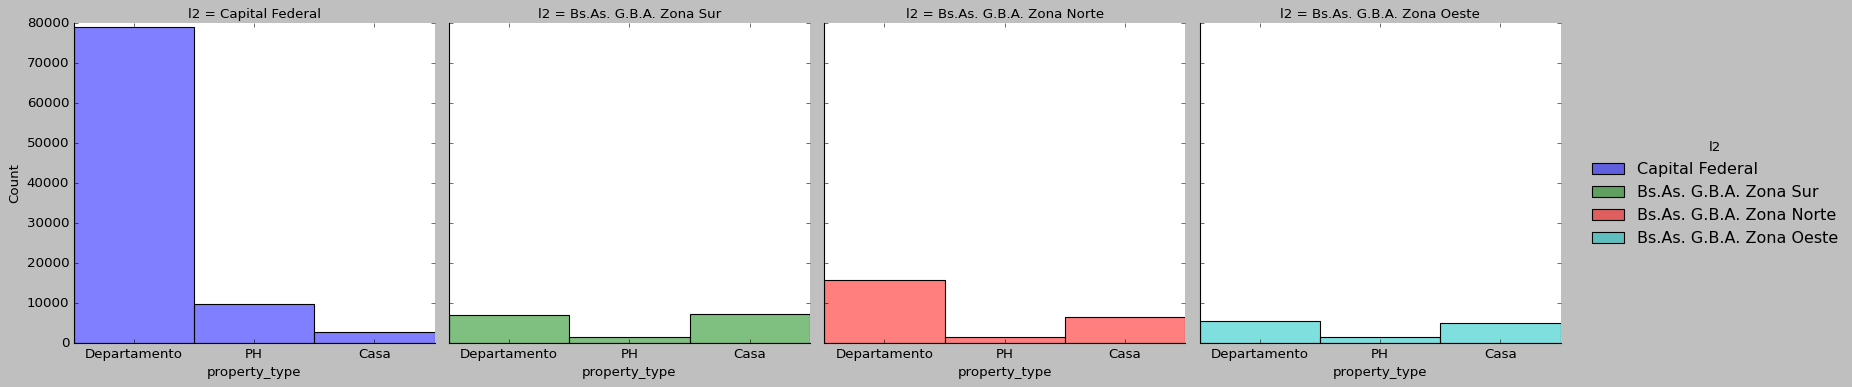

In [ ]:
sns.displot(data=Casa_Habitacion, x="property_type", hue="l2", col="l2")

# **3. Data Wrangling**

### **3.1 Creación variable de valor por mt2 (valorm2)**

### Para poder dar respuesta a las Preguntas/Hipótesis creamos la columna con los datos de valor por mt2, y la llamamos "valorm2". Ademas quitamos de la BD las variables que no vamos a utilizar en nuestro análisis: 'l1', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'title', 'currency','description','operation_type'.

In [ ]:
def valorm2(x, y):
  return(round(x/y, 2))

Casa_HabitacionM2 = Casa_Habitacion
Casa_HabitacionM2["valorm2"] = Casa_HabitacionM2.apply(lambda x: valorm2(x['price'], x['surface_total']), axis = 1)
Casa_HabitacionM2.describe()

<ipython-input-18-76c2a0cc9202>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Casa_HabitacionM2["valorm2"] = Casa_HabitacionM2.apply(lambda x: valorm2(x['price'], x['surface_total']), axis = 1)


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,valorm2
count,133552.000000,133521.000000,143145.000000,143145.000000,138934.000000,124522.000000,124236.000000,1.431450e+05,124522.000000
mean,-34.603257,-58.464695,3.096140,1.999490,1.597715,182.381089,112.374159,2.378184e+05,2376.215095
std,0.473261,0.491105,1.393088,1.129123,0.885980,1436.708405,919.025616,2.881004e+05,2496.440107
min,-35.150806,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03,0.550000
25%,-34.626417,-58.503254,2.000000,1.000000,1.000000,52.000000,47.000000,1.120000e+05,1636.360000
50%,-34.600658,-58.443272,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05,2318.180000
75%,-34.574299,-58.408279,4.000000,3.000000,2.000000,138.000000,108.000000,2.644650e+05,2959.180000
max,85.051129,-57.805832,35.000000,15.000000,14.000000,169000.000000,126062.000000,3.243423e+07,754284.470000


In [ ]:
Casa_HabitacionM2.drop(['l1', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'title', 'currency','description','operation_type'],'columns', inplace = True )
Casa_HabitacionM2.head(5)


<ipython-input-19-48acd2a1a37a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Casa_HabitacionM2.drop(['l1', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'title', 'currency','description','operation_type'],'columns', inplace = True )
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,valorm2
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,1092.86
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2271.43
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2777.78
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,3470.59
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH,800.00


In [ ]:
print(Casa_HabitacionM2.shape)

(143145, 10)


### **3.2 Análisis de outliers**

Text(0.5, 1.0, 'Valor m2')

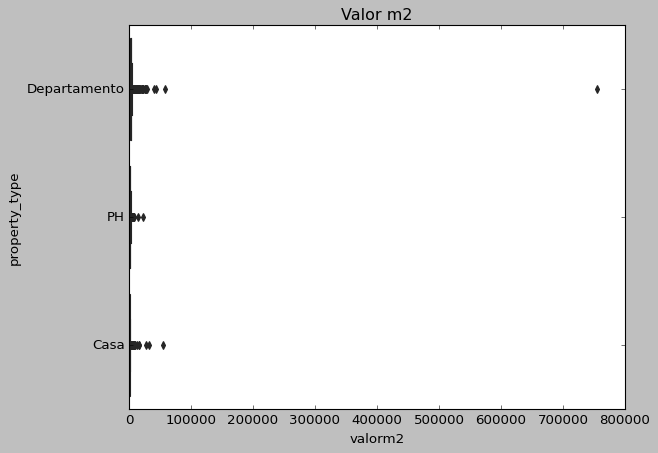

In [ ]:
sns.boxplot(x = 'valorm2', y = 'property_type', data = Casa_HabitacionM2) 
plt.title("Valor m2")

#### Del primer análisis detectamos muchos outliers, como por ejemplo en el limite inferior, valor de 0,5 centavos de dolares  y outiler superier de 754 mil dolares el metro cuadrado. Para filtrarlos del grafico, en un principio aplicamos al boxplot showfliers.

> Bloque con sangría



Text(0.5, 1.0, 'Valor m2')

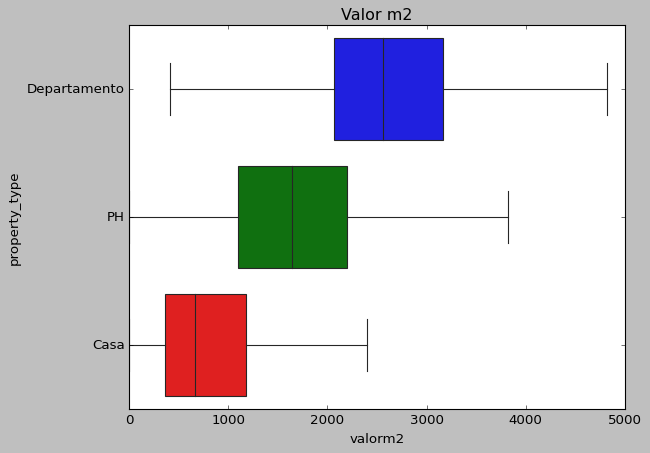

In [ ]:
sns.boxplot(x = 'valorm2', y = 'property_type', data = Casa_HabitacionM2, showfliers = False ) 
plt.title("Valor m2")

Text(0, 0.5, 'Valor de m2')

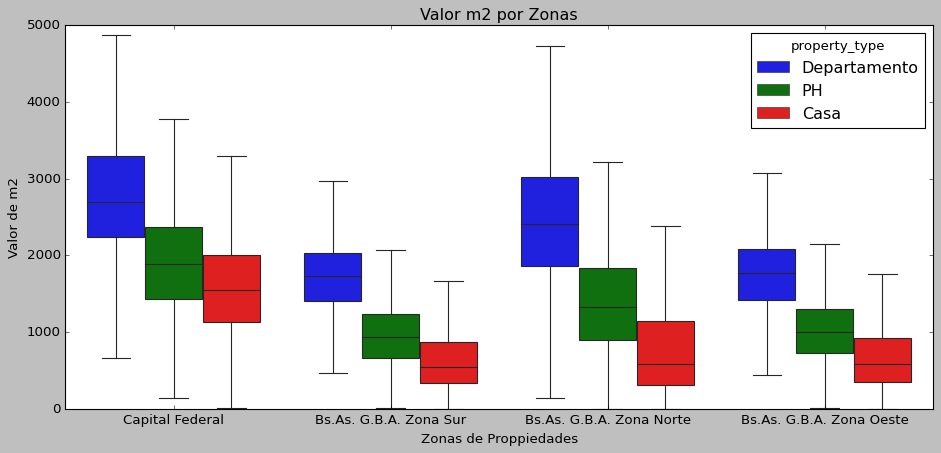

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'l2', y = 'valorm2', hue = "property_type" ,data = Casa_HabitacionM2,showfliers=False) 
plt.title("Valor m2 por Zonas")
plt.xlabel('Zonas de Proppiedades')
plt.ylabel('Valor de m2')

#### Luego de filtrar los outliers, podemos decir que el valor por metro cuadrado según el tipo de inmueble es más elevado en tipo departamentos y más bajos en casas. Ademas las propiedades ubicadas en Capital federal tiene un valor más alto que en el resto, en zona sur y oeste del gran Buenos Aires los precios son los más bajos. 



#### Para responder a las siguientes preguntas, necesitaremos hacer un análisis más profundio de los datos, debido a la gran cantidad de outliers y valores null.


### **3.3 En los siguientes casos determinaremos lo valores limites y maximos para las distintas variables , según el tipo (Casa;PH;Depto)**

In [ ]:
#Análizaremos las 3 tipologias, para determinar cuales son los limites 
Casa_HabitacionM2_Depto = Casa_HabitacionM2[Casa_HabitacionM2["property_type"] == "Departamento"]
Casa_HabitacionM2_PH = Casa_HabitacionM2[Casa_HabitacionM2["property_type"] == "PH"]
Casa_HabitacionM2_Casa = Casa_HabitacionM2[Casa_HabitacionM2["property_type"] == "Casa"]

In [ ]:
Casa_HabitacionM2_Depto.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,valorm2
count,107326.000000,107326.000000,104630.000000,93749.000000,93437.000000,1.073260e+05,93749.000000
mean,2.756471,1.757813,1.508841,99.191757,85.276315,2.367467e+05,2748.694478
std,1.145855,0.950064,0.812417,644.799251,548.341263,3.035206e+05,2726.059121
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03,1.940000
25%,2.000000,1.000000,1.000000,48.000000,44.000000,1.100000e+05,2061.540000
50%,3.000000,2.000000,1.000000,67.000000,60.000000,1.600000e+05,2564.100000
75%,3.000000,2.000000,2.000000,98.000000,85.000000,2.514020e+05,3166.670000
max,32.000000,15.000000,14.000000,108960.000000,104890.000000,3.243423e+07,754284.470000


In [ ]:
Casa_HabitacionM2_PH.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,valorm2
count,14298.000000,14298.000000,14120.000000,14169.000000,14143.000000,1.429800e+04,14169.000000
mean,3.533291,2.419569,1.485057,172.982074,130.319805,1.884935e+05,1693.702836
std,1.349232,1.161806,0.748814,2026.259186,1764.836416,1.129987e+05,781.429065
min,1.000000,0.000000,1.000000,10.000000,1.000000,1.300000e+04,0.940000
25%,3.000000,2.000000,1.000000,70.000000,56.000000,1.090000e+05,1102.940000
50%,3.000000,2.000000,1.000000,106.000000,80.000000,1.600000e+05,1646.830000
75%,4.000000,3.000000,2.000000,151.000000,118.000000,2.480000e+05,2193.880000
max,35.000000,15.000000,11.000000,126062.000000,126062.000000,1.750000e+06,22000.000000


In [ ]:
Casa_HabitacionM2_Casa.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,valorm2
count,21521.000000,21521.000000,20184.000000,16604.000000,16656.000000,2.152100e+04,16604.000000
mean,4.499652,2.925654,2.137237,660.102807,249.149856,2.759328e+05,855.554196
std,1.574487,1.347465,1.117438,3059.776312,1394.840130,2.847747e+05,874.906325
min,1.000000,0.000000,1.000000,11.000000,1.000000,1.000000e+04,0.550000
25%,3.000000,2.000000,1.000000,200.000000,111.000000,1.340000e+05,360.835000
50%,4.000000,3.000000,2.000000,300.000000,160.000000,2.100000e+05,662.500000
75%,5.000000,4.000000,3.000000,562.000000,236.000000,3.300000e+05,1175.110000
max,30.000000,15.000000,13.000000,169000.000000,75792.000000,1.111111e+07,54466.230000


#### Luego de haber analizado las distintas varaibles de estudio, según cada tipologia, establecemos los siguientes limites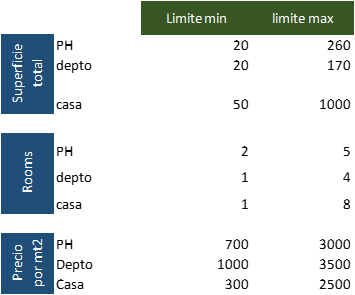

In [ ]:
Casa_HabitacionM2_limitado = Casa_HabitacionM2[(Casa_HabitacionM2['surface_total'] >= Casa_HabitacionM2['surface_covered']) & 
                        (Casa_HabitacionM2['surface_total'] < 800) & 
                        (Casa_HabitacionM2['surface_total'] > 20) &
                        (Casa_HabitacionM2['rooms'] < 8) & 
                        (Casa_HabitacionM2['rooms'] > 1) &
                        (Casa_HabitacionM2['valorm2'] > 500) & 
                        (Casa_HabitacionM2['valorm2'] < 3500)]

In [ ]:
instancias_descartadas = len(Casa_HabitacionM2) - len(Casa_HabitacionM2_limitado)
instancias_descartadas

51679

In [ ]:
Casa_HabitacionM2_limitado

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,valorm2
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,1092.86
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2271.43
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2777.78
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,3470.59
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH,800.00
...,...,...,...,...,...,...,...,...,...,...
146654,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,3.0,2.0,2.0,161.0,80.0,200000.0,Departamento,1242.24
146655,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento,3055.56
146656,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento,792.68
146658,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento,1789.47


Text(0, 0.5, 'Precio mt2')

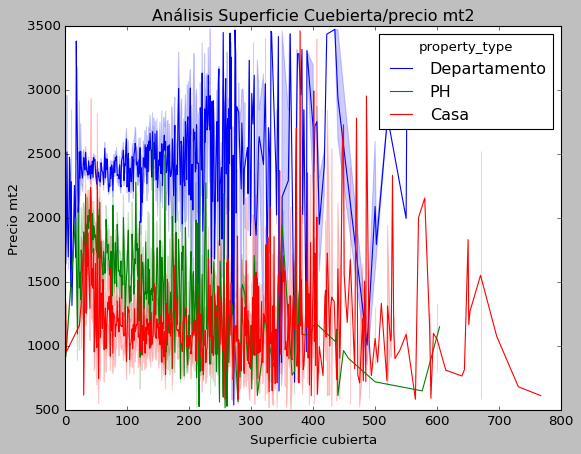

In [ ]:
sns.lineplot(x = 'surface_covered', y = 'valorm2', data = Casa_HabitacionM2_limitado, hue = "property_type" )
plt.title("Análisis Superficie Cuebierta/precio mt2")
plt.xlabel('Superficie cubierta')
plt.ylabel('Precio mt2')


Text(0, 0.5, 'precio m2')

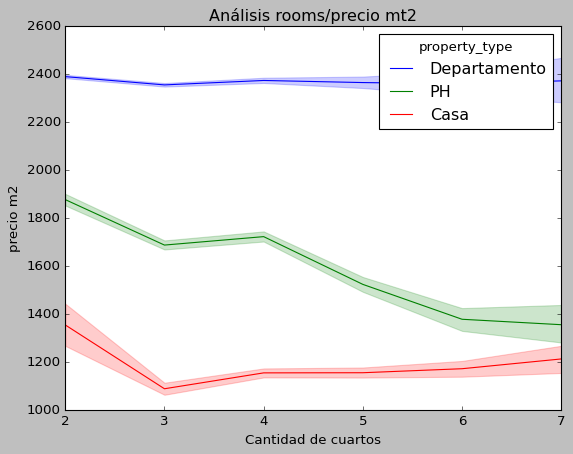

In [ ]:
sns.lineplot(x = 'rooms', y = 'valorm2', data = Casa_HabitacionM2_limitado, hue="property_type")
plt.title("Análisis rooms/precio mt2")
plt.xlabel('Cantidad de cuartos')
plt.ylabel('precio m2')

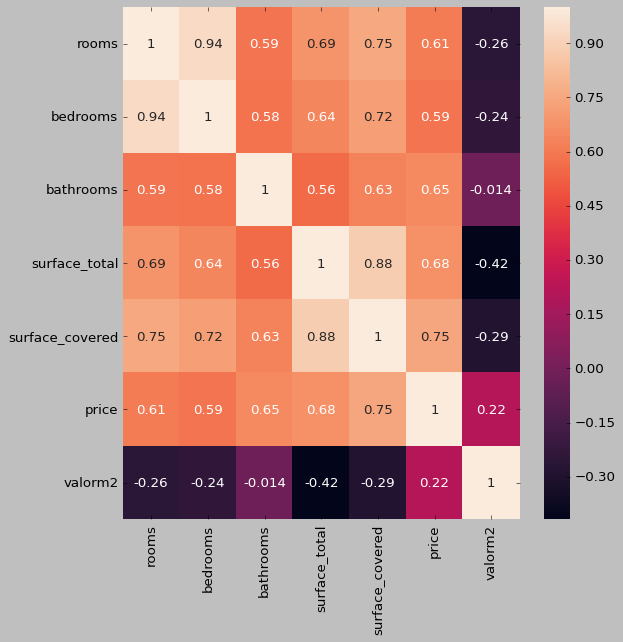

In [ ]:
fig =plt.subplots(figsize=(8,8))
sns.heatmap(Casa_HabitacionM2_limitado.corr(), annot=True)

#### Luego de haber filtrado la base de datos con limites min y max, analizamos las variables para poder predecir el precio, del cual, podemos decir que hay una correlacion positiva entre el precio y las variables bedrooms, rooms, superficie total y construida, siendo esta ultima la que tiene el mayor grado de correlacion.
####Respecto al valor del mt2, si bien el valor entre los distintos tipos de propiedad son distintos, siendo el más alto el de los departamentos y el más bajo el de las casas, no vemos una correlacion entre el valor mt2 y variables.


### **3.4 Análisis de valores nulos** 


In [ ]:
Casa_HabitacionM2_limitado.count().sort_values()

bathrooms          90225
l2                 91466
l3                 91466
rooms              91466
bedrooms           91466
surface_total      91466
surface_covered    91466
price              91466
property_type      91466
valorm2            91466
dtype: int64

In [ ]:
#columnas que tenemos valores Nan
Casa_HabitacionM2_limitado.isnull().any()  

l2                 False
l3                 False
rooms              False
bedrooms           False
bathrooms           True
surface_total      False
surface_covered    False
price              False
property_type      False
valorm2            False
dtype: bool

In [ ]:
#Sumamos los valores nulos por columna. Detectamos nulls en variable barhrooms

Casa_HabitacionM2_limitado.isnull().sum()

l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1241
surface_total         0
surface_covered       0
price                 0
property_type         0
valorm2               0
dtype: int64

In [ ]:
#Podemos notar que hay valores en nulos en la cantidad de baños, lo cual no debería ser así tratandose de departamentos, casas y Ph

Casa_HabitacionM2_limitado.isnull().sum()

l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1241
surface_total         0
surface_covered       0
price                 0
property_type         0
valorm2               0
dtype: int64

In [ ]:
##Reemplazamos los nulls de bathrooms por la moda

bathrooms_fill = Casa_HabitacionM2_limitado['bathrooms'].mode()[0]
Casa_HabitacionM2_limitado['bathrooms'].fillna(bathrooms_fill,inplace = True)



/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
Casa_HabitacionM2_limitado.isnull().sum() #chequeamos 

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
valorm2            0
dtype: int64

In [ ]:
Casa_HabitacionM2_limitado.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,valorm2
count,91466.000000,91466.000000,91466.000000,91466.000000,91466.000000,9.146600e+04,91466.000000
mean,3.128922,2.047996,1.501378,104.470765,83.798450,1.996759e+05,2160.043562
std,1.085619,0.968443,0.755181,85.572381,56.923448,1.327996e+05,727.796163
min,2.000000,0.000000,1.000000,21.000000,1.000000,2.000000e+04,500.860000
25%,2.000000,1.000000,1.000000,54.000000,48.000000,1.150000e+05,1666.670000
50%,3.000000,2.000000,1.000000,77.000000,66.000000,1.650000e+05,2224.190000
75%,4.000000,3.000000,2.000000,120.000000,98.000000,2.420000e+05,2721.520000
max,7.000000,15.000000,14.000000,797.000000,767.000000,1.980000e+06,3496.930000


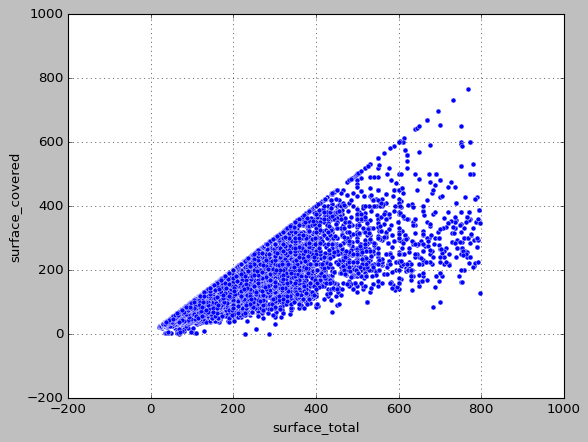

In [ ]:
#ahora vemos que los valores de superficie cubierta no superan a la sup total
sns.scatterplot(data=Casa_HabitacionM2_limitado, x='surface_total', y='surface_covered') 
plt.grid()
plt.show()

# **4. Análisis descriptivo** 

## **4.1 Analisis univariado**

In [ ]:
BD = Casa_HabitacionM2_limitado

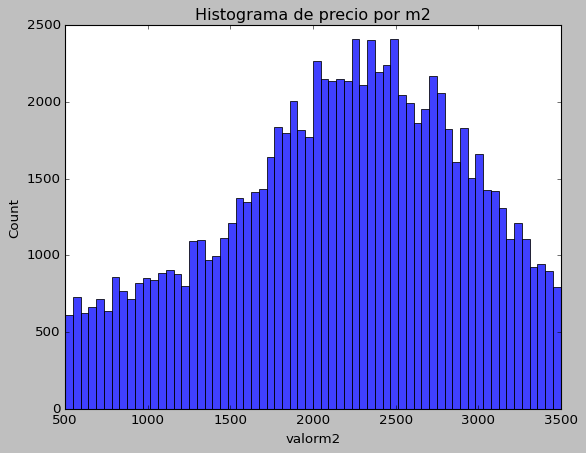

In [ ]:
sns.histplot(data=BD,x='valorm2')
plt.title('Histograma de precio por m2')
plt.show()

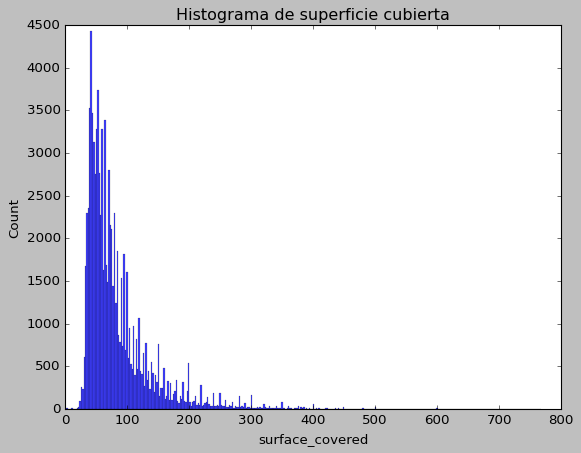

In [ ]:
sns.histplot(data=BD,x='surface_covered')
plt.title('Histograma de superficie cubierta')
plt.show()

In [ ]:
import scipy
scipy.stats.mode(BD["valorm2"]) # Moda precio por m2

ModeResult(mode=array([2500.]), count=array([1108]))

In [ ]:
scipy.stats.hmean(BD["valorm2"]) # Media armonica precio por m2

1814.7427564631523

In [ ]:
scipy.stats.variation(BD["valorm2"]) # Calcular el coeficiente de variacion precio por m2

0.3369340310008921

In [ ]:
scipy.stats.iqr(BD["valorm2"]) # Calcular el IQR precio por m2

1054.85

In [ ]:
scipy.stats.sem(BD["valorm2"]) # Calcular el Error estandar precio por m2

2.4064670423326224

In [ ]:
scipy.stats.kurtosis(BD["valorm2"]) # Calcular la kurtosis precio por m2, la distribución se alarga para valores inferiores a la media

-0.6656989446931703

## **4.2 Analisis bivariado**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


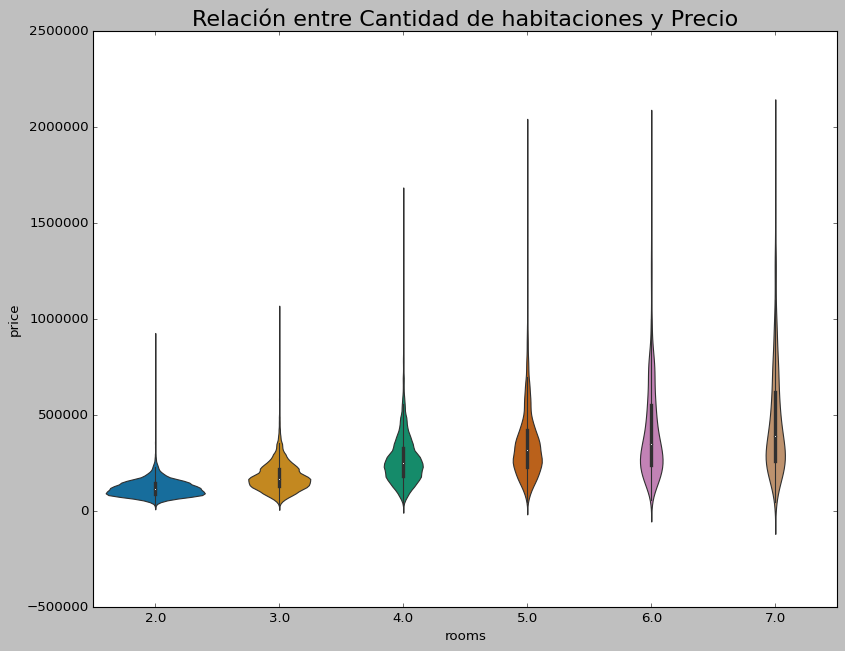

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(BD['rooms'], BD['price'], palette = 'colorblind')
plt.title('Relación entre Cantidad de habitaciones y Precio', fontsize = 20, fontweight = 30)
plt.show()

### En el grafico anterior podemos observar que a mayor cantidad de habitaciones el precio es mas elevado y la desviacion estandar es mayor, con lo cual los inmuebles con 2 habitaciones tienen menor precio, y los valores se mantienen cerca de su media, y con 7 habitaciones los precios son mas elevados y los valores varian tienen una gran variacion respecto a la media. 


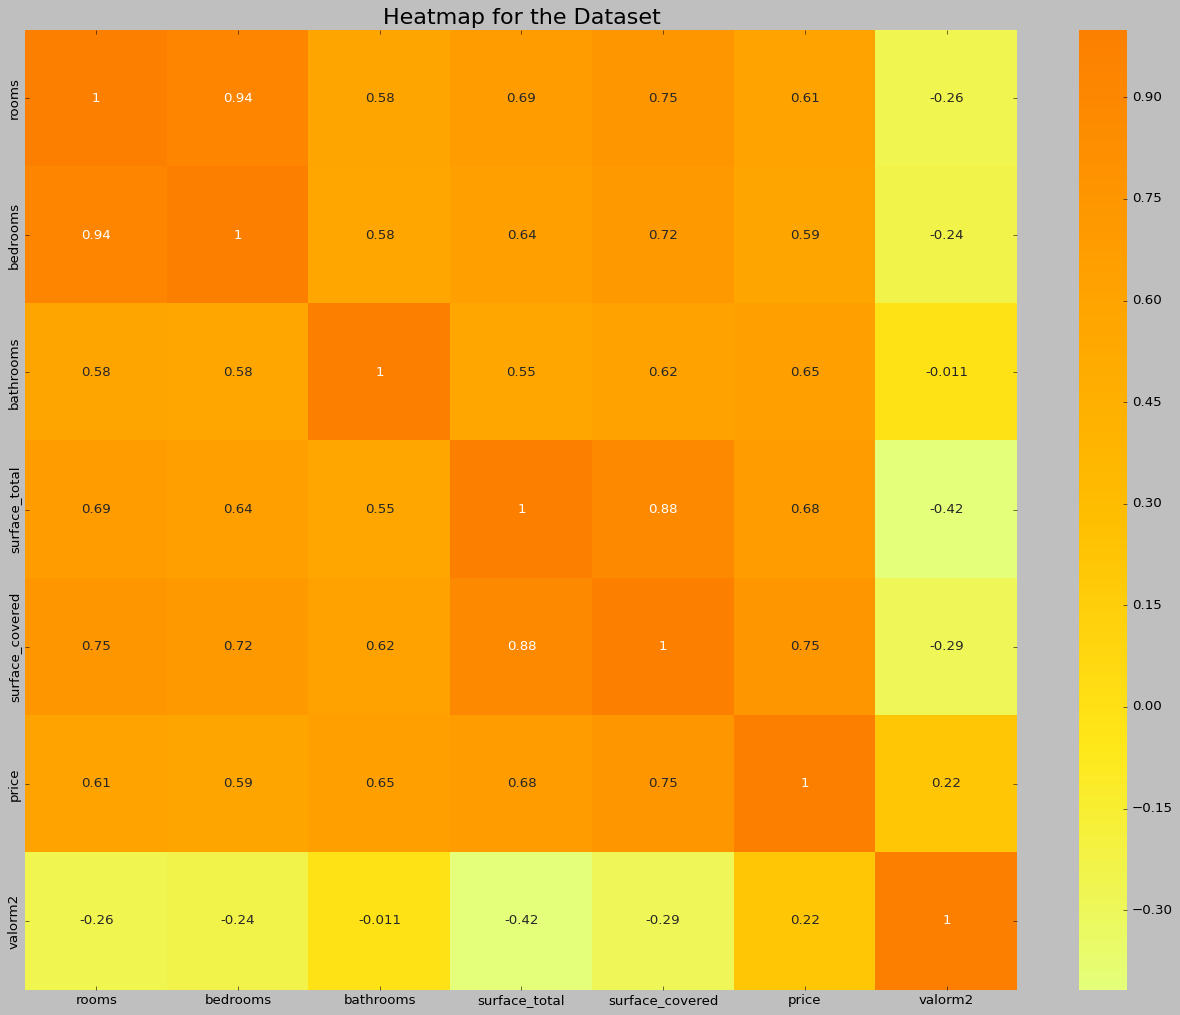

In [ ]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(BD.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

### Existe una correlacion positiva entre el precio y las variables superficie, cantidad de habitaciones. cantidad de baños y dormitorios. La mayor correlacion se da entre las variables precio y superficie cubierta

# **5. Obtencion de insights**

Luego de análizar el Dataset trabajado podemos decir que:

***El precio del mt2 depende de la zona y el tipo de inmueble.***

**Ubicación:**

+ Capital Federal y Zona Norte de G.B.A: Precios más elevados.

+ Zona Oeste y Sur de G.B.A: Precios más bajos.      

**Tipo de Inmueble:**

+ Los departamentos con precios significativamente más elevados.

+ Las casas son la opción más económica. 

+ El precio del m2 promedio es de 2376 usd.


# **6. Conclusión**

Luego del análisis y crear la variable de ***valor por m2***, podemos decir que el valor por metro cuadrado según el tipo de inmueble es más elevado en departamentos y más bajos en casas. Además las propiedades ubicadas en Capital Federal tiene un valor más alto que en el resto de las zonas, por ejemplo en zona sur y oeste del gran Buenos Aires los precios son los más bajos. 
También podemos afirmar que se destaca una correlación positiva entre el precio y la superficie cubierta.
